## Dissertação: Frederico Gomes

**Objetivo:** análise gráfica preliminar dos dados

**Autor:** Maria Luiza Campos

**Data:** Julho 2025

### Considerações

Essa é uma análise descritiva inicial. Não analisarei nenhuma correlação aqui, é apenas uma forma de descrever os dados com gráficos para
iniciar a geração de insights e compreender como eles se comportam. 

É comum que esses gráficos sejam reportados no apêndice da sua dissertação porque aqui veremos algumas limitações importantes da sua amostra. 
Então, quando você for escrever sessões como resultado, discussão e conclusão, você possivelmente referenciará esse material (contido em anexo no apêndice).

In [1]:
## Importando pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Vamos agora puxar a base

dados = pd.read_csv('dado_limpos.csv')

In [3]:
## Vamos começar analisando a variável de ESTADO

## Vamos criar um dataframe pra checar a frequência de processos por estado

# Conta a frequência de processos por estado

tabela_estados = dados['estado'].value_counts().reset_index()
tabela_estados.columns = ['estado', 'quantidade_processos']

# Ordena do mais frequente para o menos frequente

tabela_estados = tabela_estados.sort_values(by='quantidade_processos', ascending=False)

print(tabela_estados)

## Minas Gerais domina na amostra, com 30 processos no total. 

   estado  quantidade_processos
0      MG                    30
1      SP                    18
2      MS                    13
3      SC                    11
4      GO                     8
5      RS                     8
6      TO                     7
7      SE                     5
8      ES                     5
12     RO                     3
11     MT                     3
10     DF                     3
9      PR                     3
13     RN                     2
14     PI                     2
15     RJ                     2
16     CE                     2
17     RR                     2
18     AC                     1
19     AM                     1
20     AL                     1
21     MA                     1
22     PA                     1


In [4]:
## Vamos gerar um gráfico de análise: ajustes iniciais

## dicionário de macrorregiões

mapa_regioes = {
    'MG': 'Sudeste', 'SP': 'Sudeste', 'RJ': 'Sudeste', 'ES': 'Sudeste',
    'RS': 'Sul', 'SC': 'Sul', 'PR': 'Sul',
    'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste',
    'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte',
    'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte'
}

# criando uma coluna no dataset para a macrorregião 

dados['macrorregiao'] = dados['estado'].map(mapa_regioes).fillna('Não identificado')

   macrorregiao  quantidade_processos
0       Sudeste                    55
1  Centro-Oeste                    27
2           Sul                    22
3         Norte                    15
4      Nordeste                    13


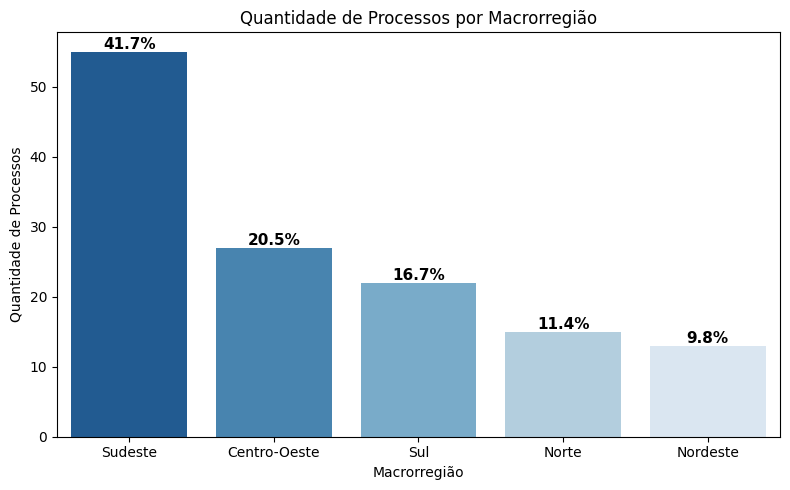

In [5]:
### GRÁFICO 1: PROCESSO POR ESTADO

## contando a frequência de processos por macrorregião

tabela_regioes = dados['macrorregiao'].value_counts().reset_index()
tabela_regioes.columns = ['macrorregiao', 'quantidade_processos']
tabela_regioes = tabela_regioes.sort_values(by='quantidade_processos', ascending=False)
print(tabela_regioes)

## Usando seaborn

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tabela_regioes,
    x='macrorregiao',
    y='quantidade_processos',
    hue='macrorregiao',
    palette='Blues_r',
    legend=False
)
# Adiciona o percentual em cada barra
total = tabela_regioes['quantidade_processos'].sum()
for p in ax.patches:
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
plt.title('Quantidade de Processos por Macrorregião')
plt.xlabel('Macrorregião')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()


A maior parte dos processos estão no Sudeste (41.7% da amostra está no Sudeste), o que é esperado. O sudeste é onde há maior probabilidade de notificação desse tipo de crime, dado que é a macrorregião mais socioeconomicamente desenvolvida do país. Adicionar qualquer controle regional não vale a pena porque esses dados não refletem, de fato, a frequência de processos por macrorregião. Eles refletem desigualdade regional na notificação. 

Exemplo: o nordeste deve ter mais casos subnotificados que o sudeste. Mas, nessa amostra, o sudeste parece ter mais frequência de casos.

Sugestão de aprimoramento: é possível fazer um gráfico situando os processos no mapa do Brasil, se você achar interessante essa informação, me avise. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/1966037462.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


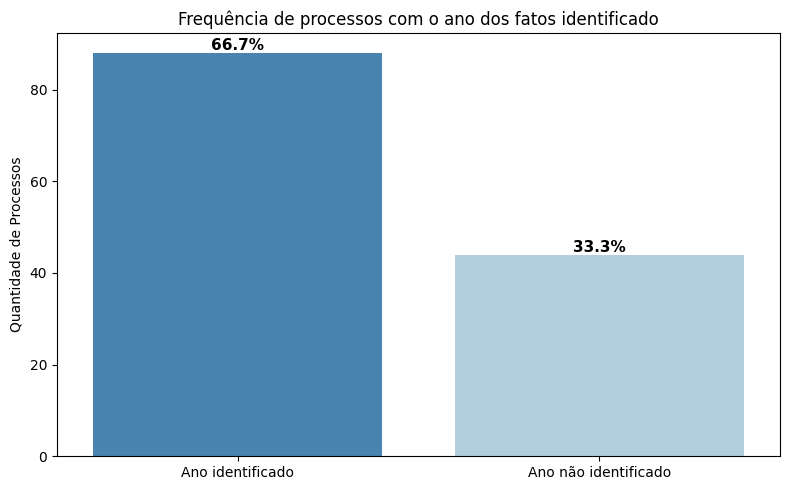

In [6]:
## GRÁFICO 2: QUANTIDADE DE PROCESSOS COM ANO DOS FATOS IDENTIFICADO

## Vamos criar uma coluna categórica

dados['ano_fatos_cat'] = dados['ano_fatos'].apply(
    lambda x: 'Ano não identificado' if str(x).strip().lower() == 'não informado' else 'Ano identificado'
)

## contando a frequência de cada categoria

tabela_ano = dados['ano_fatos_cat'].value_counts().reset_index()
tabela_ano.columns = ['categoria', 'quantidade']

## Plotando o gráfico

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tabela_ano,
    x='categoria',
    y='quantidade',
    palette='Blues_r'
)

# Adiciona o percentual em cada barra
total = tabela_ano['quantidade'].sum()
for p in ax.patches:
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Frequência de processos com o ano dos fatos identificado')
plt.xlabel('')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()




Essa informação é pouco relevante a não ser que você tenha conhecimento específico da área do direito, exemplo:
- Esses números são esperados pra esse tipo de caso em específico?

Não saberia dizer se essa informação é ou não é importante do ponto de vista jurídico. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/3874659398.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


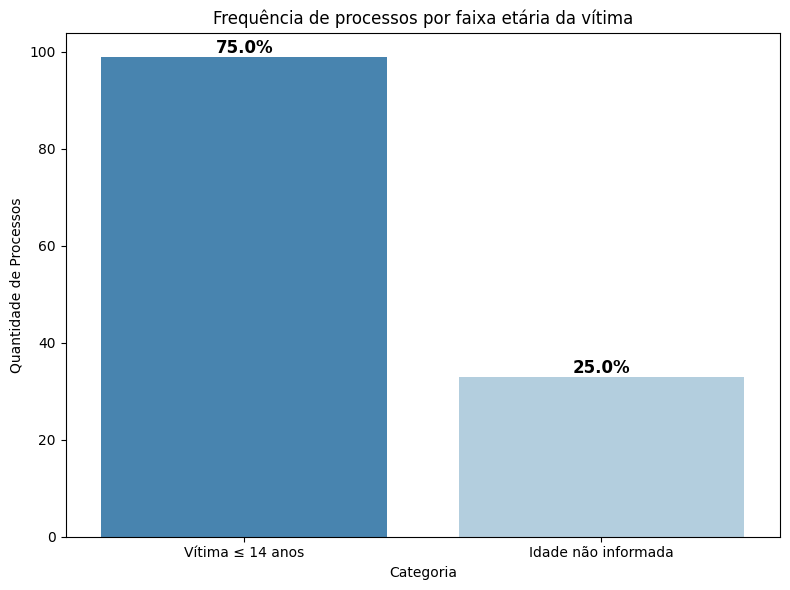

In [ ]:
 ### GRÁFICO 3: QUANTIDADE DE PROCESSOS POR IDADE DA VÍTIMA

# Conta a frequência dos valores, incluindo NaN

contagem_vitima = dados['faixa_etaria_vitima'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_vitima.index:
    if pd.isna(idx):
        labels.append('Idade não informada')
    elif idx == 0.0:
        labels.append('Vítima ≤ 14 anos')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_vitima.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra
total = contagem_vitima.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por faixa etária da vítima')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

A sua amostra não consta com nenhum processo em que a idade da vítima era maior que 14 anos. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/4034463642.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


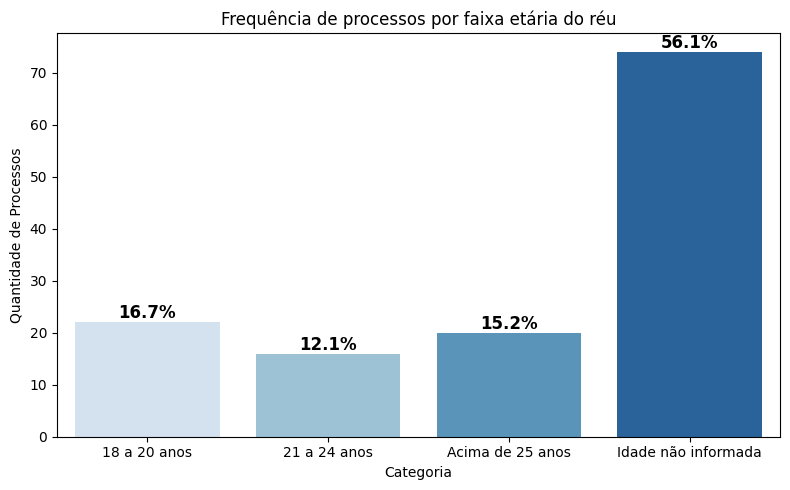

In [ ]:
## GRÁFICO 4: QUANTIDADE DE PROCESSOS POR IDADE DO RÉU

# Conta a frequência dos valores, incluindo NaN

contagem_reu = dados['faixa_etaria_reu'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_reu.index:
    if pd.isna(idx):
        labels.append('Idade não informada')
    elif idx == 0.0:
        labels.append('18 a 20 anos')
    elif idx == 1.0:
        labels.append('21 a 24 anos')
    elif idx == 2.0:
        labels.append('Acima de 25 anos')

plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=labels,
    y=contagem_reu.values,
    palette='Blues'
)

# Adiciona o percentual em cada barra
total = contagem_reu.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por faixa etária do réu')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_46123/2134681651.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_46123/2134681651.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


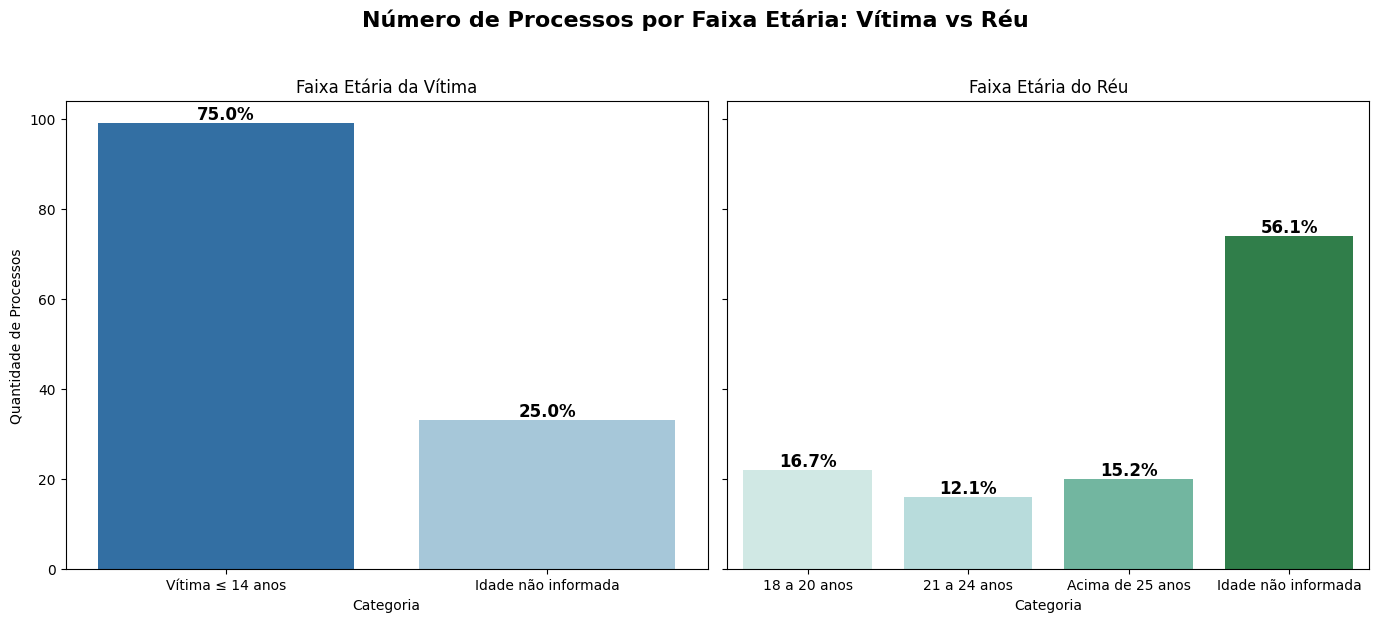

In [ ]:
## GRÁFICO 5: NÚMERO DE PROCESSOS POR FAIXA ETÁRIA: VÍTIMA VS RÉU

## Vamos criar uma dash pra comparar ambos os gráficos acima

# Gráfico da vítima
contagem_vitima = dados['faixa_etaria_vitima'].value_counts(dropna=False).sort_index()
labels_vitima = []
for idx in contagem_vitima.index:
    if pd.isna(idx):
        labels_vitima.append('Idade não informada')
    elif idx == 0.0:
        labels_vitima.append('Vítima ≤ 14 anos')

# Gráfico do réu

contagem_reu = dados['faixa_etaria_reu'].value_counts(dropna=False).sort_index()
labels_reu = []
for idx in contagem_reu.index:
    if pd.isna(idx):
        labels_reu.append('Idade não informada')
    elif idx == 0.0:
        labels_reu.append('18 a 20 anos')
    elif idx == 1.0:
        labels_reu.append('21 a 24 anos')
    elif idx == 2.0:
        labels_reu.append('Acima de 25 anos')

# Criar o dashboard

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico da vítima (azul)

sns.barplot(
    x=labels_vitima,
    y=contagem_vitima.values,
    palette=['#2171b5', '#9ecae1'],
    ax=axes[0]
)
total_vitima = contagem_vitima.sum()
for i, p in enumerate(axes[0].patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total_vitima
    axes[0].annotate(f'{percentual:.1f}%', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[0].set_title('Faixa Etária da Vítima')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Quantidade de Processos')

# Gráfico do réu (verde)

sns.barplot(
    x=labels_reu,
    y=contagem_reu.values,
    palette=['#ccece6', '#b2e2e2', '#66c2a4', '#238b45'],
    ax=axes[1]
)
total_reu = contagem_reu.sum()
for i, p in enumerate(axes[1].patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total_reu
    axes[1].annotate(f'{percentual:.1f}%', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[1].set_title('Faixa Etária do Réu')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('')
plt.suptitle('Número de Processos por Faixa Etária: Vítima vs Réu', fontsize=16, fontweight='bold', y=1.03)

plt.tight_layout()
plt.show()

A idade da vítima é sistematicamente mais documentada que a idade do réu na amostra de processos analisados. Por que? 

Talvez seja interessante agrupar aqui para que ambos os casos tenham duas categorias de análise. Torna a visualização mais fluida e os gráficos mais comparáveis. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/1055224401.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


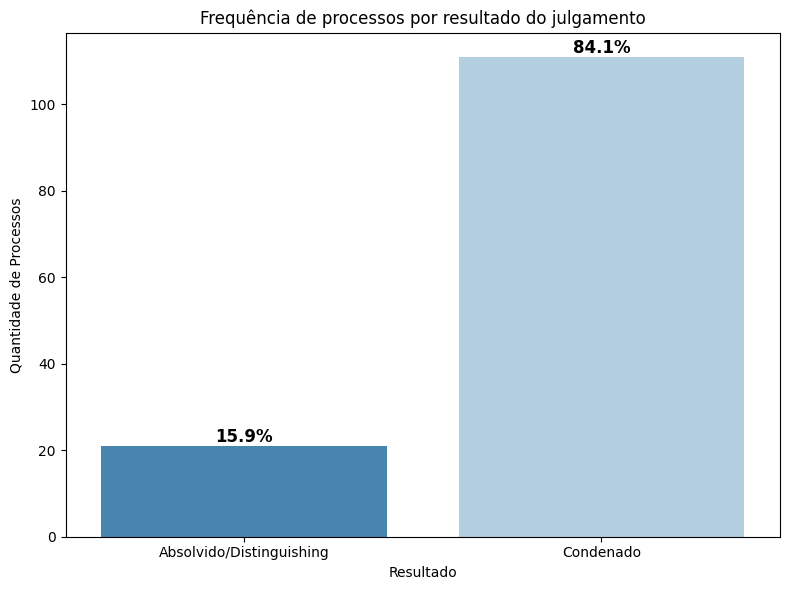

In [14]:
## GRÁFICO 5: RESULTADO DO JULGAMENTO 

# Conta a frequência dos valores, incluindo NaN

contagem_resultado = dados['resultado_julgamento'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_resultado.index:
    if pd.isna(idx):
        labels.append('Não Informado')
    elif idx == 0:
        labels.append('Absolvido/Distinguishing')
    elif idx == 1:
        labels.append('Condenado')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_resultado.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra

total = contagem_resultado.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por resultado do julgamento')
plt.xlabel('Resultado')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

O gráfico acima mostra que, na sua amostra, a absolvição é um caso raro. Isso, por si só, já é um achado importante. Sugere que o sistema jurídico brasileiro não faz uso constante de distinguishing, isto é, para esta natureza de crime, a probabilidade de ser condenado seguindo os precedentes da lei é maior. Mas é apenas uma sugestão, dado que a amostra é pequena. Só seria possível afirmar com precisão aumentando a análise para mais casos. 

Irei rodar o modelo com e sem técnicas de balanceamento para ver se os resultados alteram muito. 

Este é um gráfico que eu recomendo muito que você reporte. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/4142920131.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


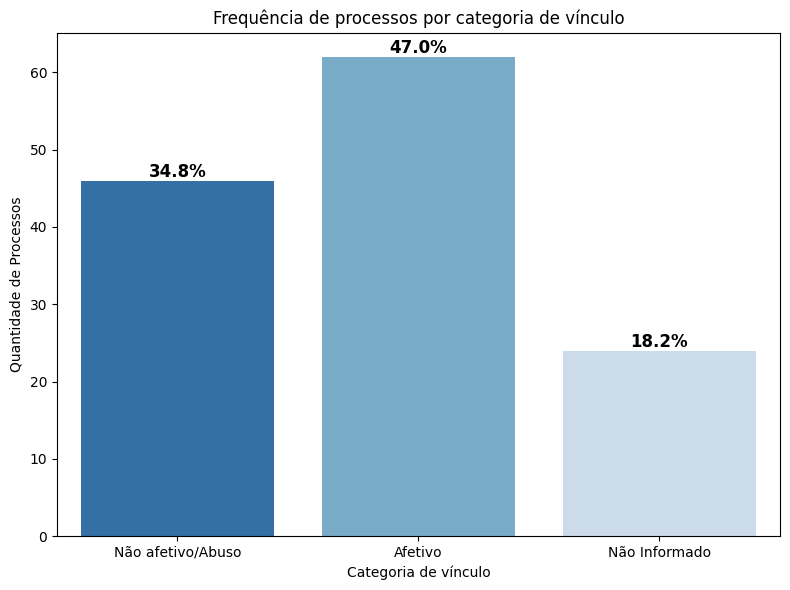

In [34]:
## GRÁFICO 6: CATEGORIA DE VÍNCULO

# Conta a frequência dos valores, incluindo NaN

contagem_vinculo = dados['categoria_vinculo'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_vinculo.index:
    if pd.isna(idx):
        labels.append('Não Informado')
    elif idx == 0:
        labels.append('Não afetivo/Abuso')
    elif idx == 1:
        labels.append('Afetivo')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_vinculo.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra

total = contagem_vinculo.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por categoria de vínculo')
plt.xlabel('Categoria de vínculo')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

**Características interessantes da sua amostra até o momento:**

• Os processos analisados representam, em média, relacionamento com vítimas com idade menor ou igual a 14 anos. A idade do réu é mais frequentemente não reportada. 

• A maior parte dos processos analisados representam julgamentos em que houve condenação. A absolvição parece um caso raro no sistema jurídico brasileiro.

• Os processos analisados representam, em média, relacionamentos de natureza afetiva, isto é, onde há afeto, namoro, casamento, relação sexual íntima ou relação casual seguida de paixão. Abuso representa 34,8% da amostra. Importante salientar que casos de abuso são historicamente não reportados pela vítima, seja por motivos de vergonha, trauma ou desconhecimento de que foi vítima de abuso. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/2582085086.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


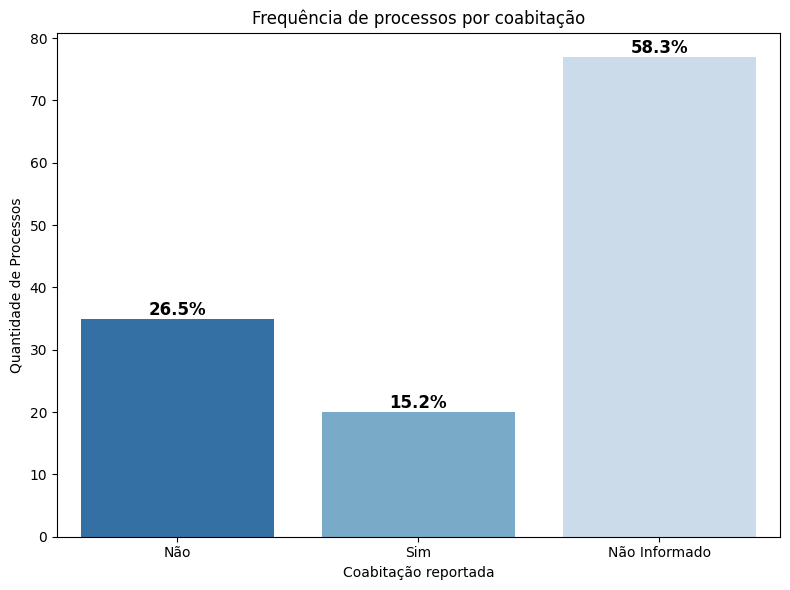

In [ ]:
## GRÁFICO 7: COABITAÇÃO

# Conta a frequência dos valores, incluindo NaN

contagem_coab = dados['coab'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_coab.index:
    if pd.isna(idx):
        labels.append('Não Informado')
    elif idx == 0:
        labels.append('Não')
    elif idx == 1:
        labels.append('Sim')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_coab.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra

total = contagem_coab.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por coabitação')
plt.xlabel('Coabitação reportada')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

A coabitação é mais frequentemente não informada. Informação difícil de definir?

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/3497196773.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


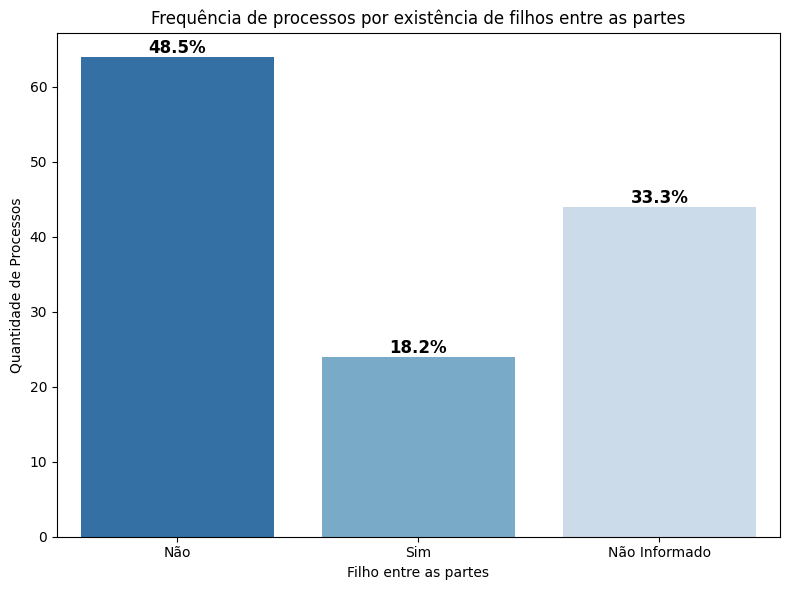

In [36]:
## GRÁFICO 8: FILHOS

# Conta a frequência dos valores, incluindo NaN

contagem_filhos = dados['filhos'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_filhos.index:
    if pd.isna(idx):
        labels.append('Não Informado')
    elif idx == 0:
        labels.append('Não')
    elif idx == 1:
        labels.append('Sim')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_filhos.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra

total = contagem_filhos.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por existência de filhos entre as partes')
plt.xlabel('Filho entre as partes')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/707681489.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


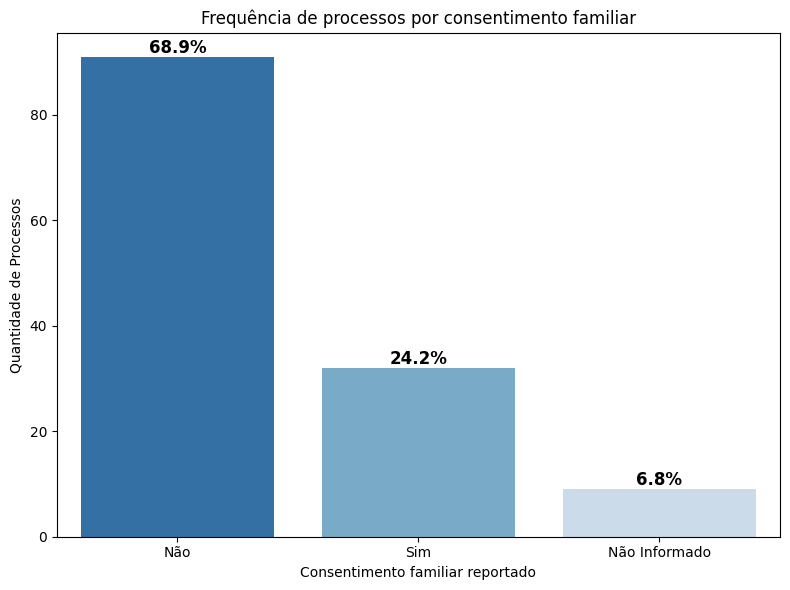

In [38]:
## GRÁFICO 9: CONSENTIMENTO FAMILIAR

# Conta a frequência dos valores, incluindo NaN

contagem_cons_fam = dados['consentimento_familiar'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_cons_fam.index:
    if pd.isna(idx):
        labels.append('Não Informado')
    elif idx == 0:
        labels.append('Não')
    elif idx == 1:
        labels.append('Sim')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_cons_fam.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra

total = contagem_cons_fam.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por consentimento familiar')
plt.xlabel('Consentimento familiar reportado')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

A família mais frequentemente não aprova o relacionamento entre as partes. Lembrando que consentimento aqui é descrito como:

• Os pais sabiam da relação e aprovavam o relacionamento. Muito embora nos documentos analisados essa variável não vem clara.

Isso é um indicador de que a documentação dos processos precisa de melhoria e o registro de consentimento familiar precisa ser melhorado. Como melhorar a reportação de consetimento? 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/2452125859.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


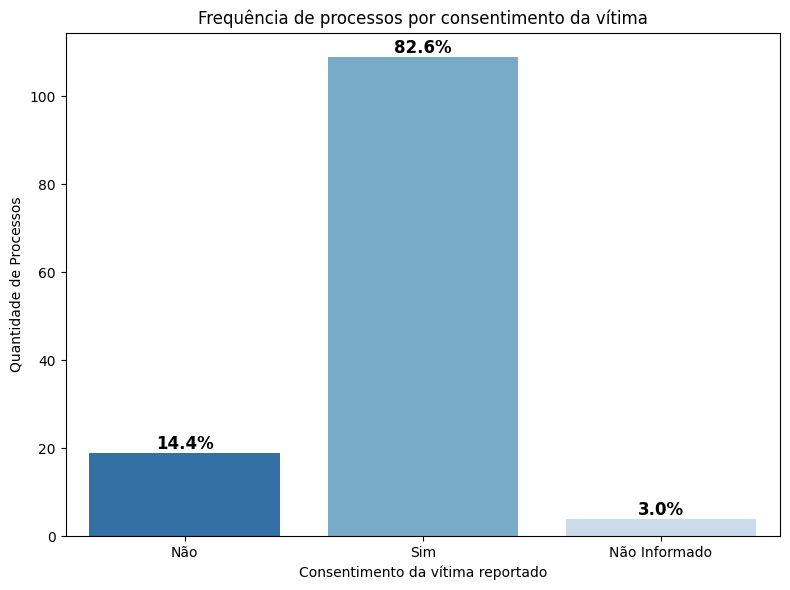

In [43]:
## GRÁFICO 10: CONSENTIMENTO DA VÍTIMA

# Conta a frequência dos valores, incluindo NaN

contagem_cons_vitima = dados['consentimento_vitima'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_cons_vitima.index:
    if pd.isna(idx):
        labels.append('Não Informado')
    elif idx == 0:
        labels.append('Não')
    elif idx == 1:
        labels.append('Sim')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_cons_vitima.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra

total = contagem_cons_vitima.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por consentimento da vítima')
plt.xlabel('Consentimento da vítima reportado')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/4084667806.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/4084667806.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


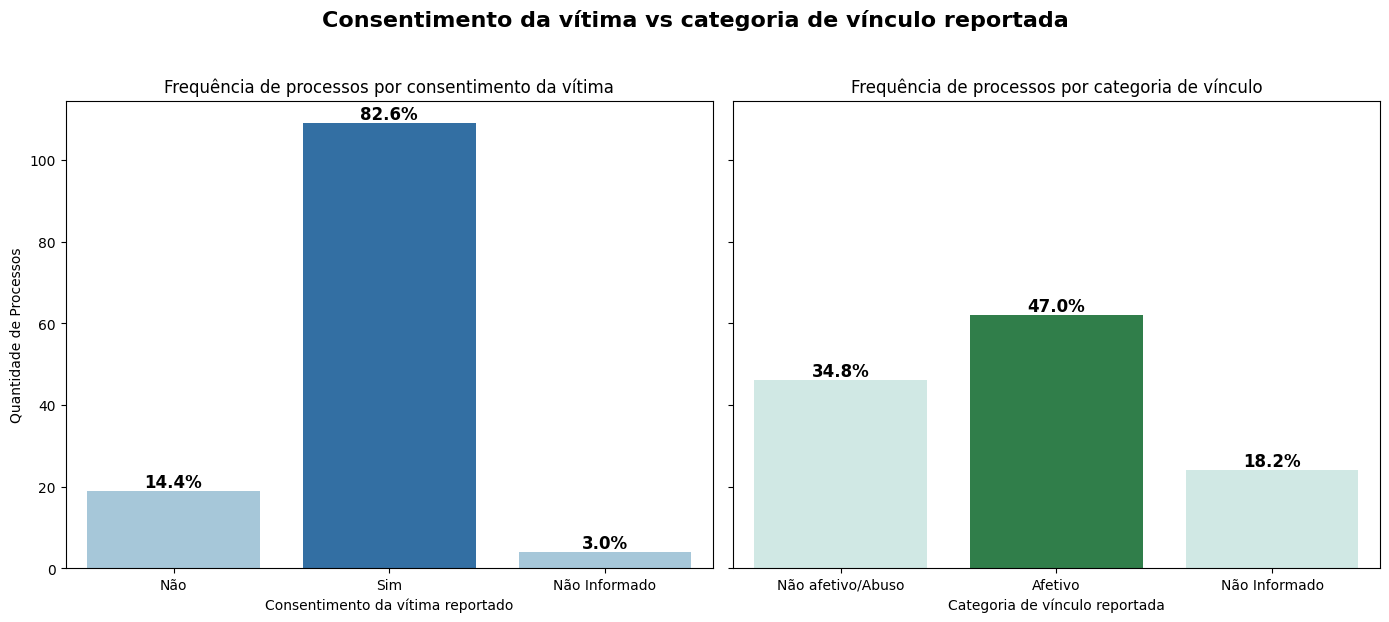

In [45]:
## GRÁFICO 11: Consentimento da vítima vs vínculo

## Vamos criar uma dash pra comparar ambos os gráficos acima

# Gráfico: consentimento da vítima

contagem_cons_vitima = dados['consentimento_vitima'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels_cons = []
for idx in contagem_cons_vitima.index:
    if pd.isna(idx):
        labels_cons.append('Não Informado')
    elif idx == 0:
        labels_cons.append('Não')
    elif idx == 1:
        labels_cons.append('Sim')
    else:
        labels_cons.append(str(idx))

# Categoria de vínculo

contagem_vinculo = dados['categoria_vinculo'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels_vin = []
for idx in contagem_vinculo.index:
    if pd.isna(idx):
        labels_vin.append('Não Informado')
    elif idx == 0:
        labels_vin.append('Não afetivo/Abuso')
    elif idx == 1:
        labels_vin.append('Afetivo')
    else:
        labels_vin.append(str(idx))

# Criar o dashboard

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico consentimento da vítima (azul)

sns.barplot(
    x=labels_cons,
    y=contagem_cons_vitima,
    palette=['#9ecae1', '#2171b5', '#9ecae1'],
    ax=axes[0]
)
total_cons = contagem_cons_vitima.sum()
for i, p in enumerate(axes[0].patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total_cons
    axes[0].annotate(f'{percentual:.1f}%', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[0].set_title('Frequência de processos por consentimento da vítima')
axes[0].set_xlabel('Consentimento da vítima reportado')
axes[0].set_ylabel('Quantidade de Processos')

# Gráfico categoria de vínculo (verde)

sns.barplot(
    x=labels_vin,
    y=contagem_vinculo.values,
    palette=['#ccece6', '#238b45','#ccece6'],
    ax=axes[1]
)
total_vin = contagem_vinculo.sum()
for i, p in enumerate(axes[1].patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total_vin
    axes[1].annotate(f'{percentual:.1f}%', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[1].set_title('Frequência de processos por categoria de vínculo')
axes[1].set_xlabel('Categoria de vínculo reportada')
axes[1].set_ylabel('')
plt.suptitle('Consentimento da vítima vs categoria de vínculo reportada', fontsize=16, fontweight='bold', y=1.03)

plt.tight_layout()
plt.show()

Na maior parte dos processos, os relacionamentos são descritos como afetivos e há consentimento da vítima. 

/var/folders/19/fl7mdk7d6bs0hjb2wl3v43pm0000gn/T/ipykernel_2363/3339982582.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


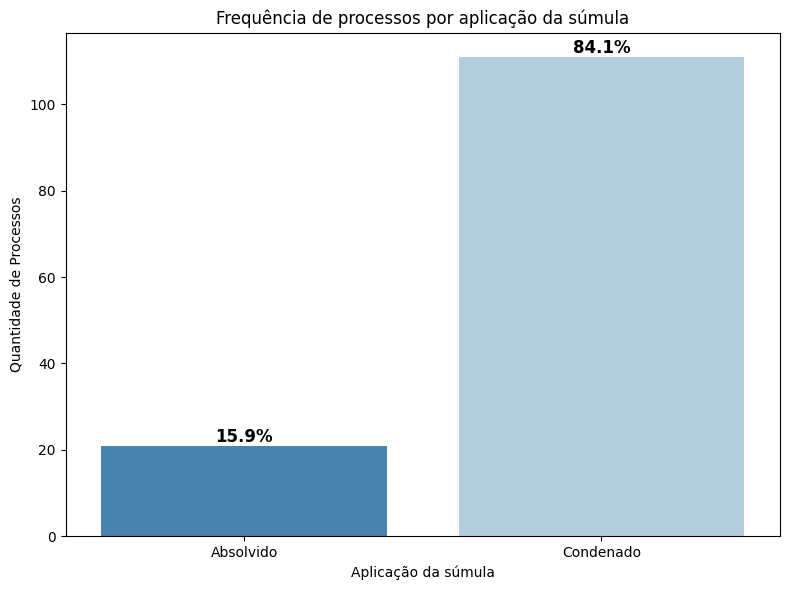

In [46]:
## GRÁFICO 12: APLICAÇÃO SUMULA

# Conta a frequência dos valores, incluindo NaN

contagem_sumula = dados['aplicacao_sumula'].value_counts(dropna=False).sort_index()

# Cria as labels personalizadas

labels = []
for idx in contagem_sumula.index:
    if pd.isna(idx):
        labels.append('Não Informado')
    elif idx == 0:
        labels.append('Absolvido')
    elif idx == 1:
        labels.append('Condenado')
    else:
        labels.append(str(idx))

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=labels,
    y=contagem_sumula.values,
    palette='Blues_r'
)

# Adiciona o percentual em cada barra

total = contagem_sumula.sum()
for i, p in enumerate(ax.patches):
    valor = int(p.get_height())
    percentual = 100 * valor / total
    ax.annotate(f'{percentual:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Frequência de processos por aplicação da súmula')
plt.xlabel('Aplicação da súmula')
plt.ylabel('Quantidade de Processos')
plt.tight_layout()
plt.show()

### Próximos passos

• Pedir ao Fred maior explicação das variáveis: aplicacao_sumula e resultado_julgamento. Qual exatamente é a variável de interesse? Então dentre os processos analisados, só alguns tiveram a aplicação da súmula? Estou meio confusa. Preciso dessa informação para rodar a análise de correlação. 

• Decidir quais gráficos da análise descritiva são interessantes reportar. Recomendo que no seu paper haja uma sessão nomeada como "análise descritiva dos dados", reportando as informações relevantes desse script. Depois de decidido, eu exporto os gráficos como png. 

• Decidir cores/design. 